In [234]:
import sys
import time

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
from fuzzytree import FuzzyDecisionTreeClassifier

In [625]:
filenames = {
    "emulab_hdd_merged": "emulab_d460_10Gbps_hdd_merged_V2.csv",
    "emulab_hdd_unmerged": "emulab_d460_10Gbps_hdd_unmerged_V2.csv",

    "utah_ssd_merged": "utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged": "utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv",

    "wisconsin_ssd_merged": "wisconsin_c220g1-10Gbps_ssd_merged_V2.csv",
    "wisconsin_ssd_unmerged": "wisconsin_c220g1-10Gbps_ssd_unmerged_V2.csv",

    "utah_ssd_merged_1g": "utah_c6525-25g_1Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged_1g": "utah_c6525-25g_1Gbps_ssd_unmerged_V2.csv",

    "wisconsin_hdd_ssd_merged": "wisconsin_c220g1-10Gbps_hdd_ssd_merged_V2.csv",
    "wisconsin_hdd-ssd_unmerged": "wisconsin_c220g1-10Gbps_hdd_ssd_unmerged_V2.csv",

    "utah_22_unmerged": "22_utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_22_merged": "22_utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv"

}

In [706]:
utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
utah_ssd_merged_1g = pd.read_csv(filenames.get('utah_ssd_merged_1g')).drop(['time_stamp', 'through_put'], axis=1)
utah_22_merged = pd.read_csv(filenames.get('utah_22_merged')).drop(['time_stamp', 'through_put'], axis=1)
emulab_hdd_merged = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_ssd_merged = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_ssd_unmerged = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_hdd_ssd_merged = pd.read_csv(filenames.get('wisconsin_hdd_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
utah_ssd_merged_1g = pd.read_csv(filenames.get('utah_ssd_merged_1g')).drop(['time_stamp', 'through_put'], axis=1)

In [664]:
# features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_avg_rtt_value', 'sender_retrans','sender_segs_in', 'sender_seg_out', 'sender_req_waittime', 'sender_read_bytes', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_ost_read' , 'sender_ost_write','sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes','receiver_segs_in','receiver_seg_out', 'receiver_req_waittime', 'receiver_read_bytes', 'receiver_write_bytes', 'receiver_ost_read', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_req_active', 'sender_write_bytes', 'sender_remote_ost_write_bytes',
#             'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write' , 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_seg_out', "sender_retrans", 'sender_avg_waittime_md', 'receiver_segs_in', 'receiver_avg_waittime_md' ,'receiver_write_bytes',]

# features =['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']

# features = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_send_buffer_value', 'sender_cpu_usage_percentage', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_read_bytes', 'sender_write_bytes', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_system_memory_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_segs_in', 'receiver_wchar', 'receiver_syscw', 'receiver_read_bytes_io', 'receiver_cpu_usage_percentage', 'receiver_req_waittime', 'receiver_req_active', 'receiver_read_bytes', 'receiver_write_bytes', 'receiver_ost_read', 'receiver_ost_write', 'receiver_pending_read_pages', 'receiver_read_RPCs_in_flight', 'receiver_avg_waittime_md', 'receiver_req_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#19 features
# features = ['sender_seg_out', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#14 features
# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#16 features
features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_tcp_snd_buffer_max', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']



In [ ]:
#[ 'sender_tcp_snd_buffer_max','receiver_seg_out', 'receiver_read_bytes_io'] # 'sender_req_active', 'sender_segs_in', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'receiver_req_active'
 ['sender_tcp_snd_buffer_max', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight']

In [710]:
# 142
emulab_hdd_merged["receiver_remote_ost_read_bytes"] = emulab_hdd_merged["receiver_remote_ost_read_bytes"] / emulab_hdd_merged[emulab_hdd_merged.label_value == 0].receiver_remote_ost_read_bytes.mean()
emulab_hdd_merged.receiver_remote_ost_read_bytes.mean()
# emulab_hdd_merged["sender_send_buffer_value"] = emulab_hdd_merged["sender_send_buffer_value"] / emulab_hdd_merged[emulab_hdd_merged.label_value == 0].sender_send_buffer_value.mean()
# emulab_hdd_merged[emulab_hdd_merged.label_value == 0].sender_ost_read

inf

In [708]:
# wisconsin_ssd_merged.receiver_write_bytes.mean()/410
wisconsin_ssd_merged["receiver_write_bytes_io"] = wisconsin_ssd_merged["receiver_write_bytes_io"] / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].receiver_write_bytes_io.mean()
# wisconsin_ssd_merged["sender_send_buffer_value"] = wisconsin_ssd_merged["sender_send_buffer_value"] / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].sender_send_buffer_value.mean()

In [709]:
# print(wisconsin_ssd_merged.receiver_ost_write.mean(), wisconsin_ssd_merged.receiver_ost_write.std())
# print(emulab_hdd_merged.receiver_ost_write.mean(), emulab_hdd_merged.receiver_ost_write.std())
# print(utah_ssd_merged.receiver_ost_write.mean(), utah_ssd_merged.receiver_ost_write.std())

# wisconsin_ssd_merged["receiver_ost_write"] = wisconsin_ssd_merged["receiver_ost_write"] / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].receiver_ost_write.mean()
# emulab_hdd_merged["receiver_ost_write"] = emulab_hdd_merged["receiver_ost_write"] / emulab_hdd_merged[emulab_hdd_merged.label_value == 0].receiver_ost_write.mean()
# utah_ssd_merged["receiver_ost_write"] = utah_ssd_merged["receiver_ost_write"] / utah_ssd_merged[utah_ssd_merged.label_value == 0].receiver_ost_write.mean()
#
# print(wisconsin_ssd_merged.sender_avg_waittime_md.mean()/410, wisconsin_ssd_merged.sender_avg_waittime_md.std())
# print(emulab_hdd_merged.sender_avg_waittime_md.mean()/142, emulab_hdd_merged.sender_avg_waittime_md.std())
# emulab_hdd_merged[["sender_avg_waittime_md", "label_value"]]
# emulab_hdd_merged.sender_req_waittime_md.mean()
# wisconsin_ssd_merged.groupby('label_value')['sender_seg_out', 'sender_avg_waittime_md', 'receiver_avg_waittime_md'].mean()
# emulab_hdd_merged.groupby('label_value')['sender_avg_waittime_md', 'receiver_avg_waittime_md'].mean()


print(wisconsin_ssd_merged.receiver_write_bytes_io.mean(), wisconsin_ssd_merged.receiver_write_bytes_io.std())
print(emulab_hdd_merged.receiver_write_bytes_io.mean(), emulab_hdd_merged.receiver_write_bytes_io.std())
# print(utah_ssd_merged.receiver_ost_write.mean(), utah_ssd_merged.receiver_ost_write.std())
# print(utah_ssd_merged.sender_seg_out.mean(), utah_ssd_merged.sender_seg_out.std())


0.6368015108068388 0.5250898084391581
0.6724994721297699 0.5545728432870538


In [611]:
def normalize_df(df):
    decimal_points = 3
    df["sender_seg_out"] = np.round(df["sender_seg_out"] / df[df.label_value == 0].sender_seg_out.mean(), decimal_points)
    df["sender_avg_send_value"] = np.round(df["sender_avg_send_value"] / df[df.label_value == 0].sender_avg_send_value.mean(), decimal_points)
    df["sender_ost_read"] = np.round(df["sender_ost_read"] / df[df.label_value == 0].sender_ost_read.mean(),decimal_points)
    df["sender_read_bytes"] = np.round(df["sender_read_bytes"] / df[df.label_value == 0].sender_read_bytes.mean(), decimal_points)
    df["sender_remote_ost_read_bytes"] = np.round(df["sender_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean(), decimal_points)
    df["receiver_segs_in"] = np.round(df["receiver_segs_in"] / df[df.label_value == 0].receiver_segs_in.mean(), decimal_points)
    df["receiver_write_bytes"] = np.round(df["receiver_write_bytes"] / df[df.label_value == 0].receiver_write_bytes.mean(), decimal_points)
    df["receiver_ost_write"] = np.round(df["receiver_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean(), decimal_points)
    df["receiver_remote_ost_write_bytes"] = np.round(df["receiver_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean(), decimal_points)

    df["sender_write_bytes_io"] = np.round(df["sender_write_bytes_io"] / df[df.label_value == 0].sender_write_bytes_io.mean(), decimal_points)
    df["sender_read_bytes_io"] = np.round(df["sender_read_bytes_io"] / df[df.label_value == 0].sender_read_bytes_io.mean(), decimal_points)
    df["receiver_write_bytes_io"] = np.round(df["receiver_write_bytes_io"] / df[df.label_value == 0].receiver_write_bytes_io.mean(), decimal_points)

    # TODO: CORRECT THIS
    df["sender_remote_ost_write_bytes"] = np.round(df["sender_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean(), decimal_points)
    # TODO: CORRECT THIS
    df["receiver_remote_ost_read_bytes"] = np.round(df["receiver_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean(), decimal_points)

    return df

In [ ]:
# columns=["label_value", "receiver_avg_waittime_md", "sender_avg_waittime_md", "sender_req_waittime", "sender_system_cpu_percent", "sender_cpu_usage_percentage", "sender_system_memory_percent",
#                            "receiver_cpu_usage_percentage", "receiver_req_waittime", "receiver_system_cpu_percent", "receiver_system_memory_percent",
#                            'sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_retrans', 'sender_ssthresh_value',
#                            'sender_pacing_rate', 'sender_avg_retransmission_timeout_value', 'sender_unacked_value', 'receiver_syscw']

In [683]:
# df = emulab_hdd_merged.copy()
df = wisconsin_ssd_merged.copy()
# df = normalize_df(df)
# df = grouped_to_5_cat(df,161)
# df = utah_ssd_merged.copy()
# df = wisconsin_ssd_unmerged.copy()
# print(df.groupby('label_value').size())
# print(df.shape)
# df.loc[df.label_value != 0, "label_value"] = 1
test_df = df.groupby('label_value').sample(40)
# test_df = df.loc[df['label_value']==0].sample(75)
# print(test_df.groupby('label_value').size())
# print(test_df.shape)
# test_df

train_df = df.drop(test_df.index)

# train_df = df
# print(train_df.shape)

y = train_df.label_value
X = train_df[features] #.drop(columns=["label_value", "receiver_avg_waittime_md", "sender_avg_waittime_md", "sender_req_waittime", "sender_system_cpu_percent", "sender_cpu_usage_percentage", "sender_system_memory_percent","receiver_cpu_usage_percentage", "receiver_req_waittime", "receiver_system_cpu_percent", "receiver_system_memory_percent",'sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_retrans', 'sender_ssthresh_value','sender_pacing_rate', 'sender_avg_retransmission_timeout_value', 'sender_unacked_value', 'receiver_syscw', 'receiver_req_waittime_md', 'receiver_avg_retransmission_timeout_value', 'sender_segs_in', 'sender_tcp_snd_buffer_min','receiver_seg_out', 'receiver_read_bytes_io', 'sender_send_buffer_value','sender_req_active','sender_mem_usage_percentage','sender_req_waittime_md', 'sender_mds_close_md', 'receiver_req_active', 'receiver_mds_close_md', 'sender_rchar', 'sender_syscr', 'receiver_rchar', 'receiver_wchar', 'receiver_mds_getattr_lock_md', 'receiver_ldlm_cancel_md', 'sender_vsize', 'receiver_syscr', 'sender_rss',  'receiver_vsize', 'receiver_rss', 'sender_mds_getattr_lock_md', 'receiver_mem_usage_percentage', 'sender_read_bytes', 'sender_write_bytes', 'receiver_write_bytes'])#.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
# clf = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier())
# clf = make_pipeline(StandardScaler(), FuzzyDecisionTreeClassifier())
# clf = tree.DecisionTreeClassifier()
# clf = FuzzyDecisionTreeClassifier()
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

# y_pred
y_pred_5cat = change_labels_5(y_pred, 21) #change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21) #change_labels_21(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
# y_pred_5cat[y_pred_5cat[:]==55]
# y_pred_5cat
Counter(y_pred_5cat)

(17526, 16)
(29232, 16)
84.58
90.67


Counter({1: 1919, 55: 2058, 109: 1468, 145: 390, 0: 7})

In [682]:
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


Cummulative Importance Score: 
 [0.11 0.2  0.28 0.36 0.44 0.51 0.58 0.62 0.66 0.7  0.73 0.76 0.79 0.81
 0.83 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97]
Counter({0.0: 40, 0.01: 12, 0.08: 3, 0.04: 3, 0.02: 3, 0.03: 3, 0.07: 2, 0.09: 1, 0.11: 1})
['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_tcp_snd_buffer_max', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
16


In [676]:
# utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
df_2 = emulab_hdd_merged.copy() # wisconsin_hdd_ssd_merged.copy()#utah_ssd_merged.copy()# wisconsin_ssd_merged.copy() #utah_ssd_merged_1g.copy() #wisconsin_ssd_merged.copy() #
df_2 = normalize_df(df_2)
df_2 = grouped_to_5_cat(df_2,161)
# df_2 = wisconsin_ssd_merged.copy() #utah_ssd_merged.copy()#
y_test = df_2.label_value
X_test = df_2[features] #.drop(columns="label_value")##[features] #.drop(columns="label_value")
# X_train, X_test, y_train, y_test = train_test_split(X,y)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21)#change_labels_21(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))

62.23
62.23


In [6]:
def change_labels_5(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

def change_labels_21(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # group read_congestion_by_sender_sender_ost read levels together
    for i in range(1, 10):
        aggregated_labels.update({i: 1})
    # group read_congestion_by_clients_on_sender_ost read levels together
    for i in range(10, 19):
        aggregated_labels.update({i: 10})
    # group read_congestion_by_receiver_on_receiver_ost read levels together
    for i in range(19, 28):
        aggregated_labels.update({i: 19})
    # group read_congestion_by_clients_on_receiver_ost read levels together
    for i in range(28, 37):
        aggregated_labels.update({i: 28})
    # group read_congestion_by_sender_on_other_ost read levels together
    for i in range(37, 46):
        aggregated_labels.update({i: 37})
    # group read_congestion_by_writer_on_other_ost read levels together
    for i in range(46, 55):
        aggregated_labels.update({i: 46})
    # group write_congestion_by_sender_on_sender_ost read levels together
    for i in range(55, 64):
        aggregated_labels.update({i: 55})
    # group write_congestion_by_clients_on_sender_ost read levels together
    for i in range(64, 73):
        aggregated_labels.update({i: 64})
    # group write_congestion_by_receiver_on_receiver read levels together
    for i in range(73, 82):
        aggregated_labels.update({i: 73})
    # group write_congestion_by_clients_on_receiver read levels together
    for i in range(82, 91):
        aggregated_labels.update({i: 82})
    # group write_congestion_by_sender_on_other_ost read levels together
    for i in range(91, 100):
        aggregated_labels.update({i: 91})
    # group write_congestion_by_receiver_on_other_ost read levels together
    for i in range(100, 109):
        aggregated_labels.update({i: 100})
    # group network_anomaly_network_loss read levels together
    for i in range(109, 113):
        aggregated_labels.update({i: 109})
    # group network_anomaly_network_delay read levels together
    for i in range(113, 117):
        aggregated_labels.update({i: 113})
    # group network_anomaly_network_duplicate read levels together
    for i in range(117, 129):
        aggregated_labels.update({i: 117})
    # group network_anomaly_network_corrupt read levels together
    for i in range(129, 133):
        aggregated_labels.update({i: 129})
    # group network_anomaly_network_reorder read levels together
    for i in range(133, 145):
        aggregated_labels.update({i: 133})
    # group sys_config_tcp_send read levels together
    for i in range(145, 151):
        aggregated_labels.update({i: 145})
    # group sys_config_tcp_receive_buffer read levels together
    for i in range(151, 157):
        aggregated_labels.update({i: 151})
    for i in range(157, 161):
        aggregated_labels.update({i: 157})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

94.25


Counter({55: 2051, 109: 1379, 1: 1915, 145: 418, 0: 79})

In [254]:
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


Cummulative Importance Score: 
 [0.05 0.1  0.14 0.18 0.22 0.26 0.29 0.32 0.35 0.38 0.41 0.44 0.46 0.48
 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.73 0.74
 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Counter({0.0: 60, 0.01: 28, 0.02: 14, 0.03: 6, 0.04: 4, 0.05: 2})
['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_ost_read', 'sender_system_cpu_percent', 'sender_remote

In [623]:
y_test = test_df.label_value
X_test = test_df[features] #.drop(columns="label_value")
print(X_test.shape)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# Counter(y_pred)
y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21)#change_labels_21(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
# y_pred_5cat[y_pred_5cat[:]==55]
# y_pred_5cat
# Counter(y_pred_5cat)

(200, 14)
78.5
78.5


In [624]:
new_df = pd.read_csv('./montage_analysis/normal.csv').drop(['time_stamp', 'through_put'], axis=1)
# new_df = pd.read_csv('./montage_analysis/montage_5_instance.csv').drop(['time_stamp', 'through_put'], axis=1)
new_df = normalize_df(new_df)
y_test = new_df.label_value
X_test = new_df[features] #.drop(columns="label_value")#[features] #.drop(columns="label_value")
print(X_test.shape)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print(Counter(y_pred))
# print(y_test)

y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21)#change_labels(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
print(Counter(y_pred_5cat))
# Counter(y_pred_5cat)
# # new_df.loc[new_df['label_value']==0]
# np.round(X_test.mean(), 2)
# np.round(train_df[train_df.label_value == 0][features].std(), 2) / np.round(X_test.std(), 2)
# train_df.groupby("label_value").receiver_avg_waittime_md.mean()

(75, 14)
0.0
Counter({55: 67, 109: 4, 1: 3, 145: 1})
0.0
Counter({55: 67, 109: 4, 1: 3, 145: 1})


In [615]:
new_df[features].describe()

,sender_seg_out,sender_avg_send_value,sender_tcp_snd_buffer_max,sender_read_bytes,sender_ost_read,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes,receiver_ost_write,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
count,75.000000,75.000000,75.0,75.000000,75.000000,75.000000,75.0,75.000000,75.000000,75.0,75.000000
mean,1.000040,1.000040,4194304.0,1.000160,1.000000,0.999987,0.0,0.999920,0.999987,0.0,1.000053
std,0.065341,0.274607,0.0,0.059391,0.145963,0.062496,0.0,0.105852,0.143460,0.0,0.108318
min,0.561000,0.169000,4194304.0,0.578000,0.251000,0.540000,0.0,0.641000,0.428000,0.0,0.649000
25%,1.012000,0.784500,4194304.0,1.009000,1.041000,1.011000,0.0,0.961000,1.010500,0.0,0.961000
50%,1.017000,1.025000,4194304.0,1.009000,1.046000,1.011000,0.0,0.988000,1.022000,0.0,0.978000
75%,1.021000,1.200000,4194304.0,1.017000,1.049000,1.018000,0.0,1.072500,1.028500,0.0,1.067000
max,1.032000,1.550000,4194304.0,1.063000,1.061000,1.026000,0.0,1.148000,1.587000,0.0,1.165000


In [616]:
df[df.label_value==0][features].describe()

,sender_seg_out,sender_avg_send_value,sender_tcp_snd_buffer_max,sender_read_bytes,sender_ost_read,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes,receiver_ost_write,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
count,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000
mean,1.000007,0.999965,4194304.0,1.000189,0.999965,1.000119,0.0,0.999986,0.999979,0.0,0.999958
std,0.138236,0.379069,0.0,0.141214,0.200396,0.139694,0.0,0.098566,0.205617,0.0,0.095579
min,0.382000,0.018000,4194304.0,0.379000,0.212000,0.380000,0.0,0.814000,0.337000,0.0,0.804000
25%,1.040000,0.783000,4194304.0,1.050000,0.982500,1.047000,0.0,0.922000,1.024000,0.0,0.928000
50%,1.057000,0.999000,4194304.0,1.058000,1.099000,1.060000,0.0,0.988000,1.045000,0.0,1.003000
75%,1.064000,1.284500,4194304.0,1.058000,1.104000,1.060000,0.0,1.046000,1.052000,0.0,1.053000
max,1.083000,1.894000,4194304.0,1.130000,1.118000,1.092000,0.0,1.436000,1.602000,0.0,1.451000


In [617]:
new_df[features]

,sender_seg_out,sender_avg_send_value,sender_tcp_snd_buffer_max,sender_read_bytes,sender_ost_read,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes,receiver_ost_write,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
0,1.022,0.480,4194304,1.063,0.942,1.026,0.0,1.113,0.428,0.0,1.156
1,1.019,0.506,4194304,1.017,1.055,1.011,0.0,1.139,1.005,0.0,1.139
2,1.010,0.754,4194304,1.009,1.049,1.011,0.0,1.130,1.016,0.0,1.121
3,1.012,0.559,4194304,1.009,1.044,1.011,0.0,1.139,1.016,0.0,1.139
4,1.015,0.598,4194304,1.009,1.047,1.011,0.0,1.130,0.956,0.0,1.139
...,...,...,...,...,...,...,...,...,...,...,...
70,1.008,0.747,4194304,1.009,1.049,1.003,0.0,0.961,1.029,0.0,0.961
71,1.021,1.238,4194304,1.009,1.046,1.018,0.0,0.935,1.021,0.0,0.943
72,0.992,1.175,4194304,1.009,1.046,1.003,0.0,0.961,1.028,0.0,0.952
73,0.866,1.190,4194304,0.955,0.601,0.949,0.0,0.970,1.024,0.0,0.978


In [618]:
df[df.label_value == 0][features]

,sender_seg_out,sender_avg_send_value,sender_tcp_snd_buffer_max,sender_read_bytes,sender_ost_read,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes,receiver_ost_write,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
9005,1.065,1.194,4194304,1.130,0.989,1.076,0.0,1.088,0.639,0.0,1.086
9006,1.060,0.877,4194304,1.058,1.100,1.060,0.0,1.046,1.038,0.0,1.053
9007,1.062,1.666,4194304,1.058,1.098,1.060,0.0,1.046,1.046,0.0,1.044
9008,1.055,1.390,4194304,1.050,1.092,1.060,0.0,1.054,1.041,0.0,1.044
9009,0.747,0.059,4194304,0.799,0.809,0.760,0.0,1.046,1.023,0.0,0.978
...,...,...,...,...,...,...,...,...,...,...,...
9143,1.056,1.053,4194304,1.050,1.096,1.051,0.0,0.930,1.051,0.0,0.920
9144,1.056,1.187,4194304,1.058,1.107,1.060,0.0,0.938,1.045,0.0,0.945
9145,1.055,1.438,4194304,1.050,1.096,1.060,0.0,0.847,0.996,0.0,0.829
9146,0.907,1.695,4194304,0.929,1.109,0.922,0.0,0.814,1.096,0.0,0.812


In [589]:
# df.groupby("label_value").sender_seg_out.mean()
df[df.label_value == 0][features]
# df[["receiver_seg_out", "label_value" ]]

,sender_seg_out,sender_avg_send_value,sender_tcp_snd_buffer_max,sender_read_bytes,sender_ost_read,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_seg_out,receiver_segs_in,receiver_write_bytes,receiver_ost_write,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
9005,1.065,1.194,4194304,1.130,0.989,1.076,0.0,3590.0,1.042,1.088,0.639,0.0,1.086
9006,1.060,0.877,4194304,1.058,1.100,1.060,0.0,3200.0,1.040,1.046,1.038,0.0,1.053
9007,1.062,1.666,4194304,1.058,1.098,1.060,0.0,3408.0,1.037,1.046,1.046,0.0,1.044
9008,1.055,1.390,4194304,1.050,1.092,1.060,0.0,3201.0,1.042,1.054,1.041,0.0,1.044
9009,0.747,0.059,4194304,0.799,0.809,0.760,0.0,2288.0,0.725,1.046,1.023,0.0,0.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,1.056,1.053,4194304,1.050,1.096,1.051,0.0,3610.0,1.037,0.930,1.051,0.0,0.920
9144,1.056,1.187,4194304,1.058,1.107,1.060,0.0,3424.0,1.039,0.938,1.045,0.0,0.945
9145,1.055,1.438,4194304,1.050,1.096,1.060,0.0,3242.0,1.030,0.847,0.996,0.0,0.829
9146,0.907,1.695,4194304,0.929,1.109,0.922,0.0,2822.0,0.845,0.814,1.096,0.0,0.812


In [225]:
new_df[new_df.receiver_write_bytes <= 310378496.].receiver_write_bytes
# new_df[new_df.sender_cwnd_rate <= 330.].sender_cwnd_rate

53    301989888
54    310378496
Name: receiver_write_bytes, dtype: int64

In [161]:
train_df[train_df.label_value == 0][features]

,sender_avg_rtt_value,sender_cwnd_rate,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,sender_tcp_snd_buffer_min,sender_tcp_snd_buffer_max,sender_req_active,sender_write_bytes,...,receiver_segs_in,receiver_req_waittime,receiver_req_active,receiver_write_bytes,receiver_ost_write,receiver_avg_waittime_md,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes
9007,0.263,659.0,0.0,548.0,3401.0,29026.1,4096,4194304,1179,0,...,382156.0,10071030,1219,528482304,10071030,508,4.5,1.7,0,528482304
9011,0.312,616.0,0.0,474.0,3075.0,22871.0,4096,4194304,1188,0,...,385019.0,9177842,1186,528482304,9177842,508,4.2,2.0,0,532676608
9012,0.474,639.0,0.0,474.0,3202.0,15616.4,4096,4194304,1188,0,...,386568.0,10169760,1207,528482304,10169760,508,4.5,2.0,0,532676608
9014,0.382,659.0,0.0,474.0,3342.0,19983.9,4096,4194304,1190,0,...,385154.0,9967355,1218,528482304,9967355,508,4.5,2.1,0,528482304
9022,0.283,373.0,0.0,260.0,3830.0,15268.0,4096,4194304,1083,0,...,377159.0,5364040,756,532676608,5364040,508,4.6,1.6,0,545259520
9023,0.585,603.0,0.0,260.0,3544.0,11940.4,4096,4194304,1188,0,...,382615.0,10075130,1222,536870912,10075130,508,4.3,1.7,0,528482304
9027,0.567,557.0,0.0,475.0,2936.0,11379.7,4096,4194304,857,0,...,370055.0,4106501,582,503316480,4106501,508,3.9,1.9,0,532676608
9031,0.526,666.0,0.0,475.0,3213.0,14667.2,4096,4194304,1143,0,...,382616.0,10106007,1213,528482304,10106007,508,4.4,2.1,0,524288000
9034,0.322,681.0,0.0,475.0,3235.0,24499.1,4096,4194304,1179,0,...,383120.0,10022413,1145,499122176,10022413,508,4.4,2.3,0,499122176
9036,0.332,687.0,0.0,475.0,3345.0,23970.5,4096,4194304,1179,0,...,382956.0,10033328,1053,461373440,10033328,508,4.1,2.4,0,457179136


In [591]:
class_names = [str(lbl) for lbl in sorted(Counter(train_df.label_value).keys())]
class_names

['0', '1', '55', '109', '145']

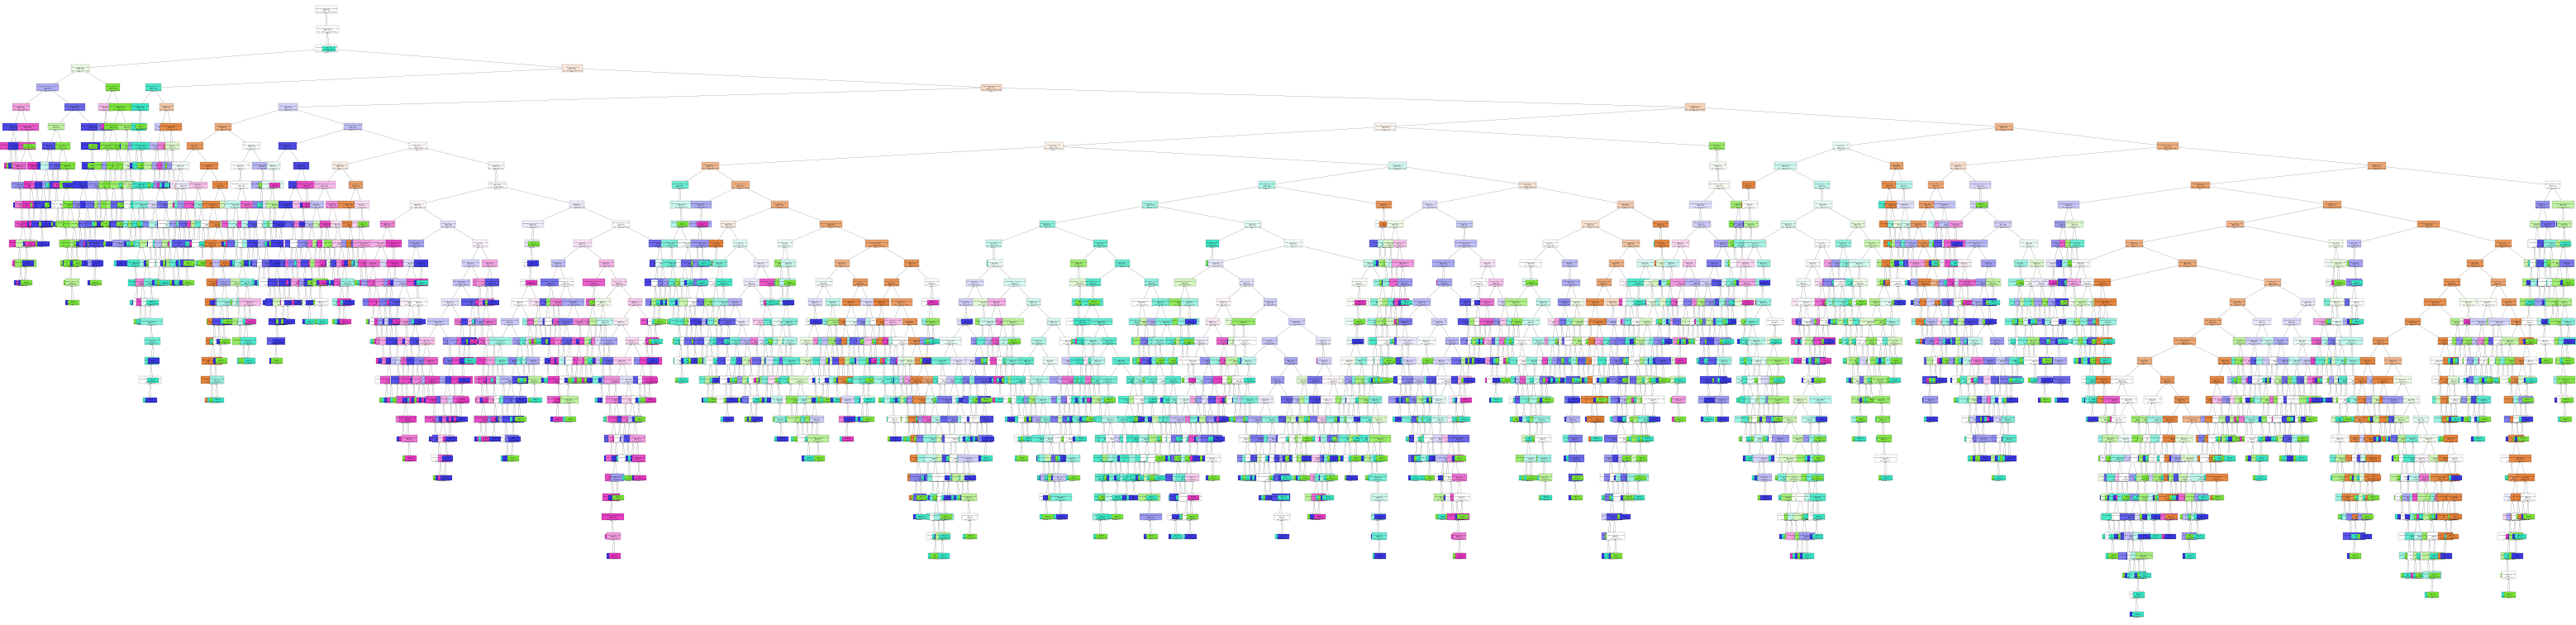

In [614]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (400,100), dpi=10)
tree.plot_tree(clf, feature_names = features,
               class_names=class_names,
               filled = True,
               fontsize=8);
fig.savefig('tree_7.pdf')

# tree.plot_tree(clf, feature_names=features, fontsize=12)

In [603]:
# utah_ssd_merged.loc[utah_ssd_merged['label_value']==0]


12

In [243]:
def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [19]:
df = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
# df = grouped_to_5_cat(df,161)
df.shape
Counter(df.label_value)

Counter({98: 148,
         38: 151,
         31: 137,
         59: 159,
         27: 138,
         141: 163,
         63: 158,
         80: 158,
         123: 139,
         136: 154,
         147: 142,
         13: 154,
         120: 145,
         125: 146,
         24: 139,
         26: 143,
         124: 143,
         9: 163,
         57: 158,
         15: 158,
         47: 143,
         4: 169,
         29: 123,
         114: 155,
         1: 168,
         22: 137,
         73: 142,
         7: 159,
         131: 160,
         122: 139,
         54: 153,
         36: 136,
         83: 137,
         49: 143,
         132: 153,
         121: 146,
         157: 161,
         126: 145,
         39: 152,
         127: 142,
         105: 151,
         128: 146,
         56: 154,
         37: 150,
         154: 157,
         70: 152,
         11: 161,
         52: 155,
         60: 157,
         133: 147,
         103: 138,
         66: 160,
         42: 154,
         35: 139,
         116

In [316]:
t = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
t[t.label_value == 0].receiver_avg_waittime_md

11117    149
11118    149
11119    149
11120    149
11121    149
        ... 
11293    158
11294    158
11295    158
11296    158
11297    158
Name: receiver_avg_waittime_md, Length: 181, dtype: int64